In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load necessary data
products = pd.read_csv('/content/products.csv')
orders = pd.read_csv('/content/orders.csv')
order_items = pd.read_csv('/content/order_items.csv')
geolocation = pd.read_csv('/content/geolocation.csv')

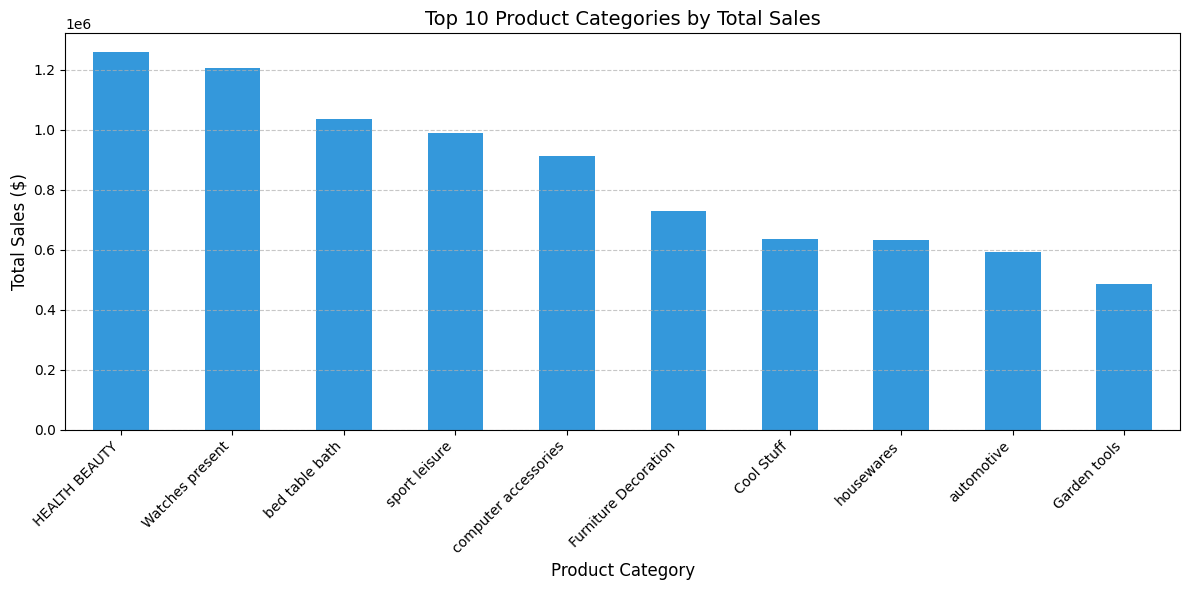

In [2]:
# Aggregate data
sales_per_cat = pd.merge(order_items, products, on='product_id')
cat_sales = sales_per_cat.groupby('product category')['price'].sum().sort_values(ascending=False).head(10)

# Create Bar Chart
plt.figure(figsize=(12, 6))
cat_sales.plot(kind='bar', color='#3498db')
plt.title('Top 10 Product Categories by Total Sales', fontsize=14)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

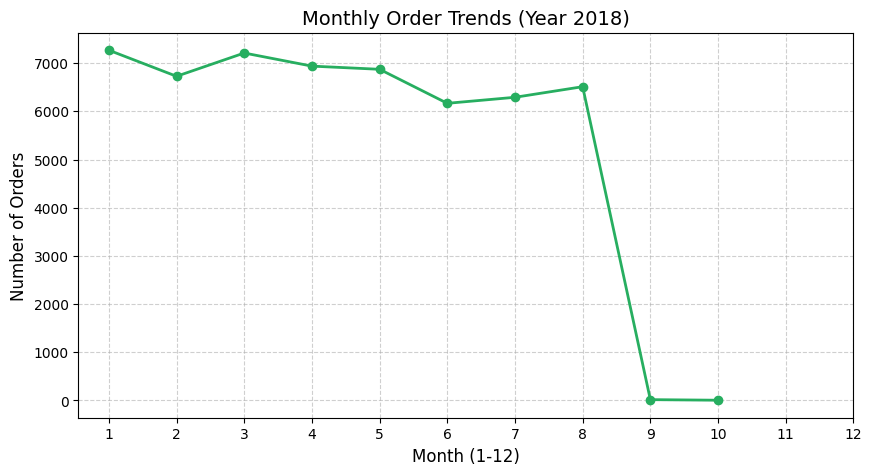

In [3]:
# Convert to datetime and filter for 2018
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018].copy()
orders_2018['month'] = orders_2018['order_purchase_timestamp'].dt.month
monthly_counts = orders_2018.groupby('month').size()

# Create Line Graph
plt.figure(figsize=(10, 5))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='#27ae60', linewidth=2)
plt.title('Monthly Order Trends (Year 2018)', fontsize=14)
plt.xlabel('Month (1-12)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

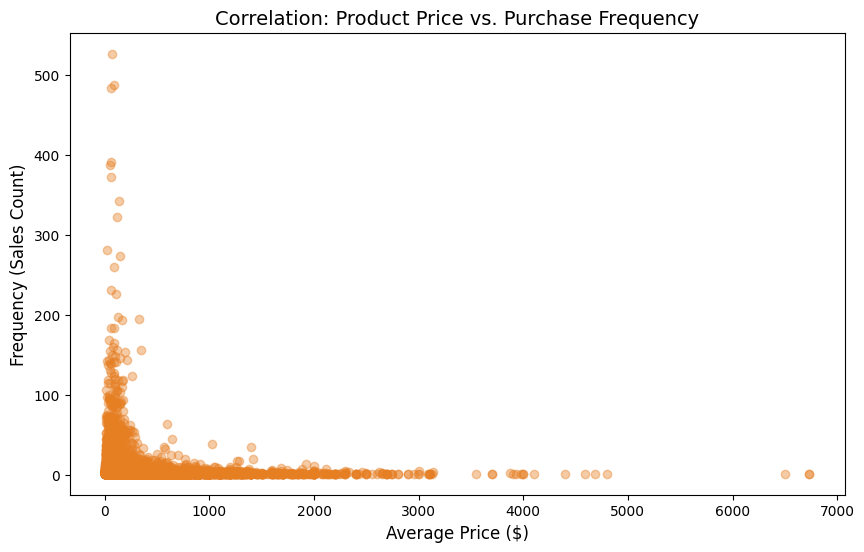

In [4]:
# Calculate stats per product
prod_stats = order_items.groupby('product_id').agg(
    avg_price=('price', 'mean'),
    purchase_count=('order_id', 'count')
)

# Create Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(prod_stats['avg_price'], prod_stats['purchase_count'], alpha=0.4, color='#e67e22')
plt.title('Correlation: Product Price vs. Purchase Frequency', fontsize=14)
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Frequency (Sales Count)', fontsize=12)
plt.show()

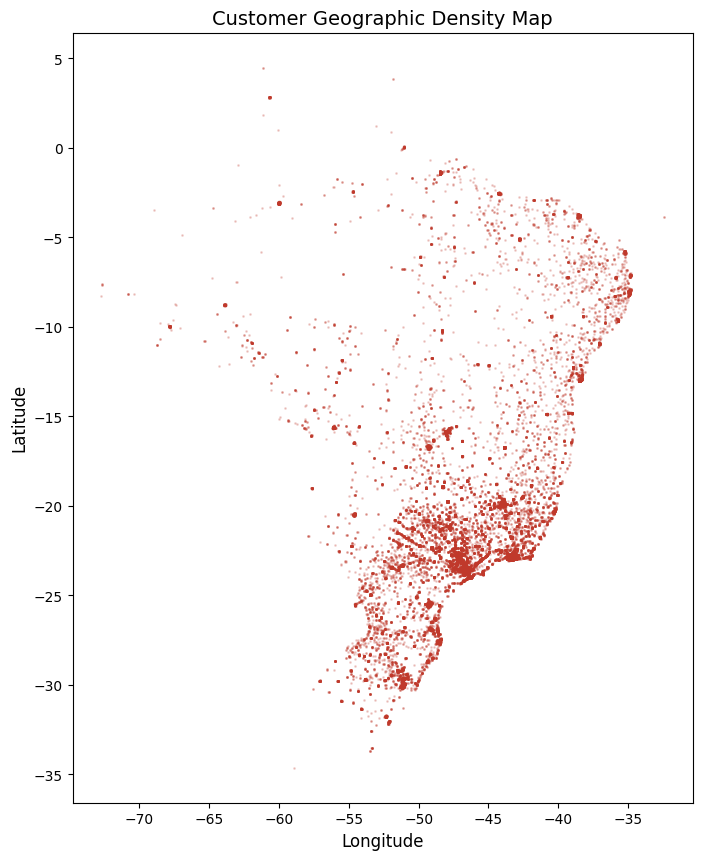

In [5]:
# Sample the data for performance (geolocation is very large)
geo_sample = geolocation.sample(n=50000, random_state=42)

# Create Density Map
plt.figure(figsize=(8, 10))
plt.scatter(geo_sample['geolocation_lng'], geo_sample['geolocation_lat'], s=1, alpha=0.2, color='#c0392b')
plt.title('Customer Geographic Density Map', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()